In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [12]:
path = '/content/drive/MyDrive/colab notebook pessoal/Countries_exercise.csv'
basedir = pd.read_csv(path)
basedir


,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


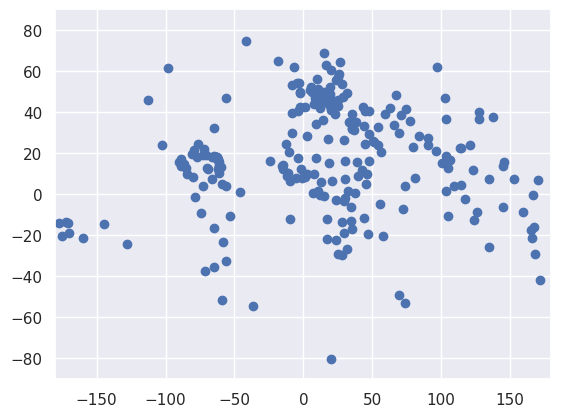

In [13]:
plt.scatter(basedir['Longitude'], basedir['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [14]:
x = basedir.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [15]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [16]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 3, 0, 1, 0, 0, 0, 3, 1, 0, 1, 0, 2, 3, 1, 2, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 3, 3, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 3, 3, 1, 0, 1, 0, 2, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0,
       2, 3, 3, 0, 3, 3, 1, 1, 3, 0, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 3, 1, 2, 0, 0, 0, 3, 0, 3, 2, 0, 0, 1, 3, 0, 3,
       0, 2, 0, 2, 0, 1, 1, 0, 0, 3, 2, 2, 3, 3, 1, 1, 1, 2, 2, 2, 0, 1,
       3, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 3, 3, 3, 2, 1, 1, 0,
       0, 3, 0, 0, 0, 1, 1, 3, 0, 1, 1, 1, 1, 3, 2, 1, 1, 0, 0, 0, 0],
      dtype=int32)

In [17]:
data_with_clusters = basedir.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


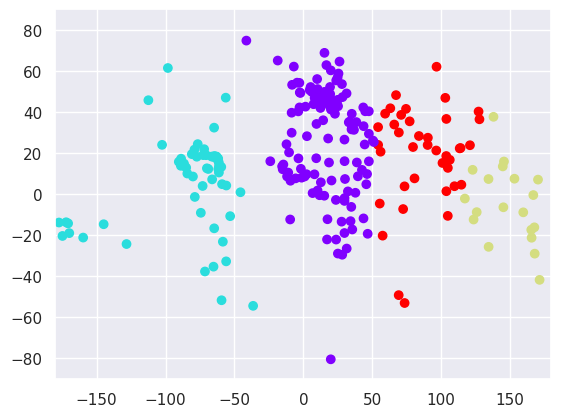

In [18]:
plt.scatter(basedir['Longitude'], basedir['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()                  # usando o parametro c pra separar os dados a partir dos clusters definidos

In [19]:
kmeans.inertia_

281775.60567351175

In [20]:
wcss = []

cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [21]:
wcss

[1413859.6798344278,
 657012.0797586322,
 325274.2867531905,
 256631.91873914734,
 196267.48168184928,
 152164.15221066383,
 146545.9276946173,
 111653.13234970691,
 97569.73978972259,
 79737.81647524162]

Text(0, 0.5, 'WCSS')

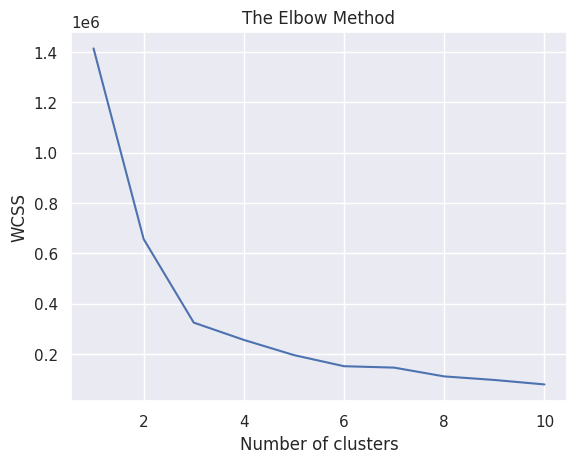

In [22]:
num_clusters = range(1 , cl_num)
plt.plot(num_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

3 parece ser um bom numero de clusters, logo:

In [23]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [24]:
identified_clusters = kmeans.fit_predict(x)

data_with_clusters = basedir.copy()
data_with_clusters['Cluster'] = identified_clusters


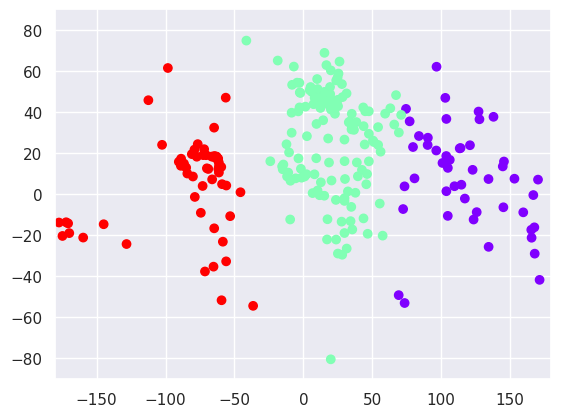

In [25]:
plt.scatter(basedir['Longitude'], basedir['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()